# Обработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style="darkgrid")

In [2]:
!wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.intersect_with_DeepZ.bed

--2021-12-01 20:33:21--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.intersect_with_DeepZ.bed
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.intersect_with_DeepZ.bed [following]
--2021-12-01 20:33:22--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.intersect_with_DeepZ.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 303183 (296K) [text/plain]
Saving to: ‘H2AFZ_brain.intersect_with_DeepZ.bed’

H2AFZ_brain.interse 100%[===================>] 296.08K  --.-KB/s    i

In [3]:
pos = pd.read_csv('H2AFZ_brain.intersect_with_DeepZ.bed', sep='\t', header=None)
header = ['chrom', 'chromStart', 'chromEnd']
pos.columns = header[:len(pos.columns)]

In [4]:
pos

,chrom,chromStart,chromEnd
0,chr1,762665,762892
1,chr1,894548,894874
2,chr1,934027,934044
3,chr1,975932,976162
4,chr1,1004735,1004904
...,...,...,...
12701,chrY,2709577,2709618
12702,chrY,2709789,2709805
12703,chrY,13458427,13458504
12704,chrY,13833280,13833404


In [5]:
pos['len'] = pos['chromEnd'] - pos['chromStart']

In [6]:
pos['center'] = (pos['chromStart'] + pos['chromEnd']) // 2

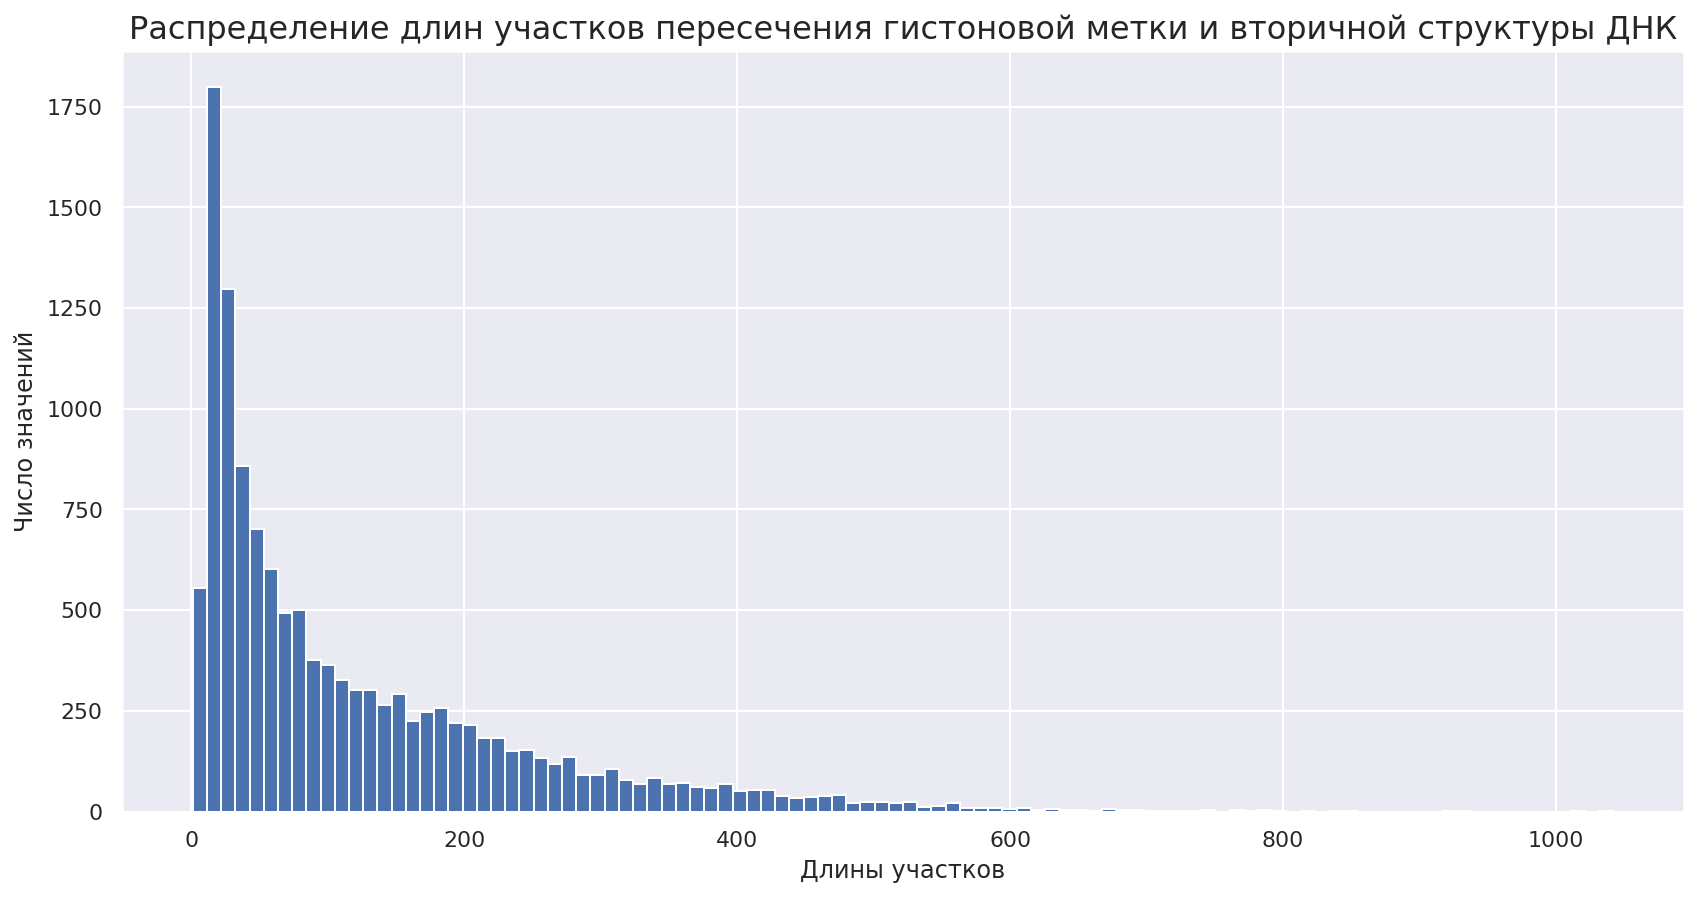

In [7]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['font.size'] = 12
plt.hist(pos['chromEnd'] - pos['chromStart'], bins=100)
plt.title('Распределение длин участков пересечения гистоновой метки и вторичной структуры ДНК', size=16)
plt.xlabel('Длины участков')
plt.ylabel('Число значений')
plt.show()

In [8]:
pos['len'].value_counts()

11     269
12     220
15     207
14     203
13     200
      ... 
587      1
531      1
491      1
459      1
747      1
Name: len, Length: 632, dtype: int64

Предлагается отобрать участки примерно одинаковой длины, но чтобы модель корректно обучилась, нам нужен большой объем данных. Из гистограммы видно, что у нас много маленьких пересечений, поэтому возьму те, у которых длина 14 bp:

In [9]:
pos[pos['len'] == 14]

,chrom,chromStart,chromEnd,len,center
5,chr1,1051479,1051493,14,1051486
47,chr1,6259985,6259999,14,6259992
182,chr1,24970074,24970088,14,24970081
240,chr1,28879753,28879767,14,28879760
329,chr1,38218836,38218850,14,38218843
...,...,...,...,...,...
12506,chrX,24043251,24043265,14,24043258
12563,chrX,54835539,54835553,14,54835546
12583,chrX,70366062,70366076,14,70366069
12596,chrX,73641488,73641502,14,73641495


In [10]:
pos.drop(pos[pos['len'] != 14].index, inplace=True)

In [11]:
pos

,chrom,chromStart,chromEnd,len,center
5,chr1,1051479,1051493,14,1051486
47,chr1,6259985,6259999,14,6259992
182,chr1,24970074,24970088,14,24970081
240,chr1,28879753,28879767,14,28879760
329,chr1,38218836,38218850,14,38218843
...,...,...,...,...,...
12506,chrX,24043251,24043265,14,24043258
12563,chrX,54835539,54835553,14,54835546
12583,chrX,70366062,70366076,14,70366069
12596,chrX,73641488,73641502,14,73641495


In [12]:
pos['chromStart'] = pos['center'] - 7

In [13]:
pos['chromEnd'] = pos['center'] + 7

In [14]:
pos

,chrom,chromStart,chromEnd,len,center
5,chr1,1051479,1051493,14,1051486
47,chr1,6259985,6259999,14,6259992
182,chr1,24970074,24970088,14,24970081
240,chr1,28879753,28879767,14,28879760
329,chr1,38218836,38218850,14,38218843
...,...,...,...,...,...
12506,chrX,24043251,24043265,14,24043258
12563,chrX,54835539,54835553,14,54835546
12583,chrX,70366062,70366076,14,70366069
12596,chrX,73641488,73641502,14,73641495


In [15]:
!wget https://www.dropbox.com/s/5mps86dwoymdhil/Genome.bed

--2021-12-01 20:33:23--  https://www.dropbox.com/s/5mps86dwoymdhil/Genome.bed
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5mps86dwoymdhil/Genome.bed [following]
--2021-12-01 20:33:23--  https://www.dropbox.com/s/raw/5mps86dwoymdhil/Genome.bed
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf0d9f14c74d40445d8db3dccd8.dl.dropboxusercontent.com/cd/0/inline/BbDUtmy4vbBGv81bdiAeWKy_HyerS700T1QmhoolLeI3d6xynb0aDoPmbqkZ9449_0UTXd6ACfC_p-YBSqcbmPBxkxYnA9JXz1h0ieqOlDZI9pH_H4pSv8X2ZnMO-1tepmQlViBVjVjL03573P59HUBM/file# [following]
--2021-12-01 20:33:24--  https://ucf0d9f14c74d40445d8db3dccd8.dl.dropboxusercontent.com/cd/0/inline/BbDUtmy4vbBGv81bdiAeWKy_HyerS700T1QmhoolLeI3d6xynb0aDoPmbqkZ9449_0UTXd6ACfC_p-YBSqcbmPBxkxYnA9JX

In [16]:
!wget http://hgdownload.cse.ucsc.edu/admin/exe/linux.x86_64/twoBitToFa
!chmod a+x twoBitToFa

--2021-12-01 20:33:24--  http://hgdownload.cse.ucsc.edu/admin/exe/linux.x86_64/twoBitToFa
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9367560 (8.9M)
Saving to: ‘twoBitToFa’

twoBitToFa          100%[===================>]   8.93M  12.7MB/s    in 0.7s    

2021-12-01 20:33:25 (12.7 MB/s) - ‘twoBitToFa’ saved [9367560/9367560]



In [17]:
for i in range(pos.shape[0]):
    name = pos.iloc[i, :]['chrom']
    start = pos.iloc[i, :]['chromStart']
    end = pos.iloc[i, :]['chromEnd']
    file_name = str(i) + 'z.fa'
    !./twoBitToFa http://hgdownload.cse.ucsc.edu/gbdb/hg19/hg19.2bit $file_name -seq=$name -start=$start -end=$end

In [18]:
!cat *z.fa > pos.fa

In [19]:
genome = pd.read_csv('Genome.bed', sep='\t', header=None)

In [20]:
genome

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,66999043,67216822,NM_001376549.1,0,+,67000041,67208778,0,23,"47,123,64,25,72,57,55,176,25,52,86,93,75,128,1...","0,885,92486,99709,102583,106416,109449,110183,..."
1,chr1,66999043,67216822,NM_001376535.1,0,+,67000041,67208778,0,26,"47,123,64,25,72,57,55,176,12,12,25,52,86,93,75...","0,885,92486,99709,102583,106416,109449,110183,..."
2,chr1,66999275,67216822,NM_001376554.1,0,+,67000041,67208778,0,21,"80,123,64,25,57,55,176,25,52,86,93,75,128,127,...","0,653,92254,99477,106184,109217,109951,137402,..."
3,chr1,66999275,67216822,NM_001376551.1,0,+,67000041,67208778,0,22,"80,123,64,25,57,55,176,25,52,86,93,75,128,127,...","0,653,92254,99477,106184,109217,109951,137402,..."
4,chr1,66999275,67216822,NM_001308203.2,0,+,67000041,67208778,0,22,"80,123,64,25,57,55,176,25,52,86,93,75,128,127,...","0,653,92254,99477,106184,109217,109951,137402,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
87140,chr7_gl000195_random,42937,86735,NM_001242480.3,0,-,44723,49117,0,4,"1986,165,60,218,","0,6017,31183,43580,"
87141,chr7_gl000195_random,42937,86735,NM_001347680.2,0,-,46775,49117,0,3,"3864,165,218,","0,6017,43580,"
87142,chr7_gl000195_random,42937,86735,NM_001347681.2,0,-,44723,49117,0,3,"1986,165,218,","0,6017,43580,"
87143,chr7_gl000195_random,42937,86735,NR_144628.2,0,-,86735,86735,0,2,"1986,218,","0,43580,"


In [21]:
! apt-get install bedtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 577 kB of archives.
After this operation, 2,040 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 bedtools amd64 2.26.0+dfsg-5 [577 kB]
Fetched 577 kB in 1s (826 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../bedtools_2.26.0+dfsg-5_amd64.deb ...
Unpacking bedtools (2.26.0+dfsg-5) ...
Setting up bedtools (2.26.0+dfsg-5) ...


Скачаем вторичную структуру ДНК и гистоновую метку:

In [22]:
!wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/DeepZ.bed

--2021-12-01 20:35:42--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/DeepZ.bed
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/DeepZ.bed [following]
--2021-12-01 20:35:42--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/DeepZ.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 461744 (451K) [text/plain]
Saving to: ‘DeepZ.bed’

DeepZ.bed           100%[===================>] 450.92K  --.-KB/s    in 0.04s   

2021-12-01 20:35:42 (11.9 MB/s) - ‘DeepZ.bed’ saved [461744/461744]



In [23]:
!wget https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.merge.hg19.bed

--2021-12-01 20:35:43--  https://github.com/netwasted/hse21_H2AFZ_ZDNA_human/raw/main/data/H2AFZ_brain.merge.hg19.bed
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.merge.hg19.bed [following]
--2021-12-01 20:35:43--  https://raw.githubusercontent.com/netwasted/hse21_H2AFZ_ZDNA_human/main/data/H2AFZ_brain.merge.hg19.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4717002 (4.5M) [text/plain]
Saving to: ‘H2AFZ_brain.merge.hg19.bed’

H2AFZ_brain.merge.h 100%[===================>]   4.50M  --.-KB/s    in 0.08s   

2021-12-01 20:35:44 (57.6 M

In [24]:
!bedtools subtract -a Genome.bed -b DeepZ.bed > gg.bed

In [25]:
!bedtools subtract -a gg.bed -b H2AFZ_brain.merge.hg19.bed > neg.bed

In [26]:
neg = pd.read_csv('neg.bed', sep='\t', header=None)

In [27]:
neg.shape

(410842, 12)

In [28]:
genome.shape

(87145, 12)

In [29]:
genome.drop([3, 4, 5, 6, 7, 8, 9, 10, 11], axis=1, inplace=True)
header = ['chrom', 'chromStart', 'chromEnd']
genome.columns = header[:len(genome.columns)]
genome['len'] = genome['chromEnd'] - genome['chromStart']

In [30]:
#neg.drop([3, 4, 5, 6, 7, 8, 9, 10, 11], axis=1, inplace=True)
header = ['chrom', 'chromStart', 'chromEnd', '3', '4', '5', '6', '7', '8', '9', '10', '11']
neg.columns = header
neg['len'] = neg['chromEnd'] - neg['chromStart']

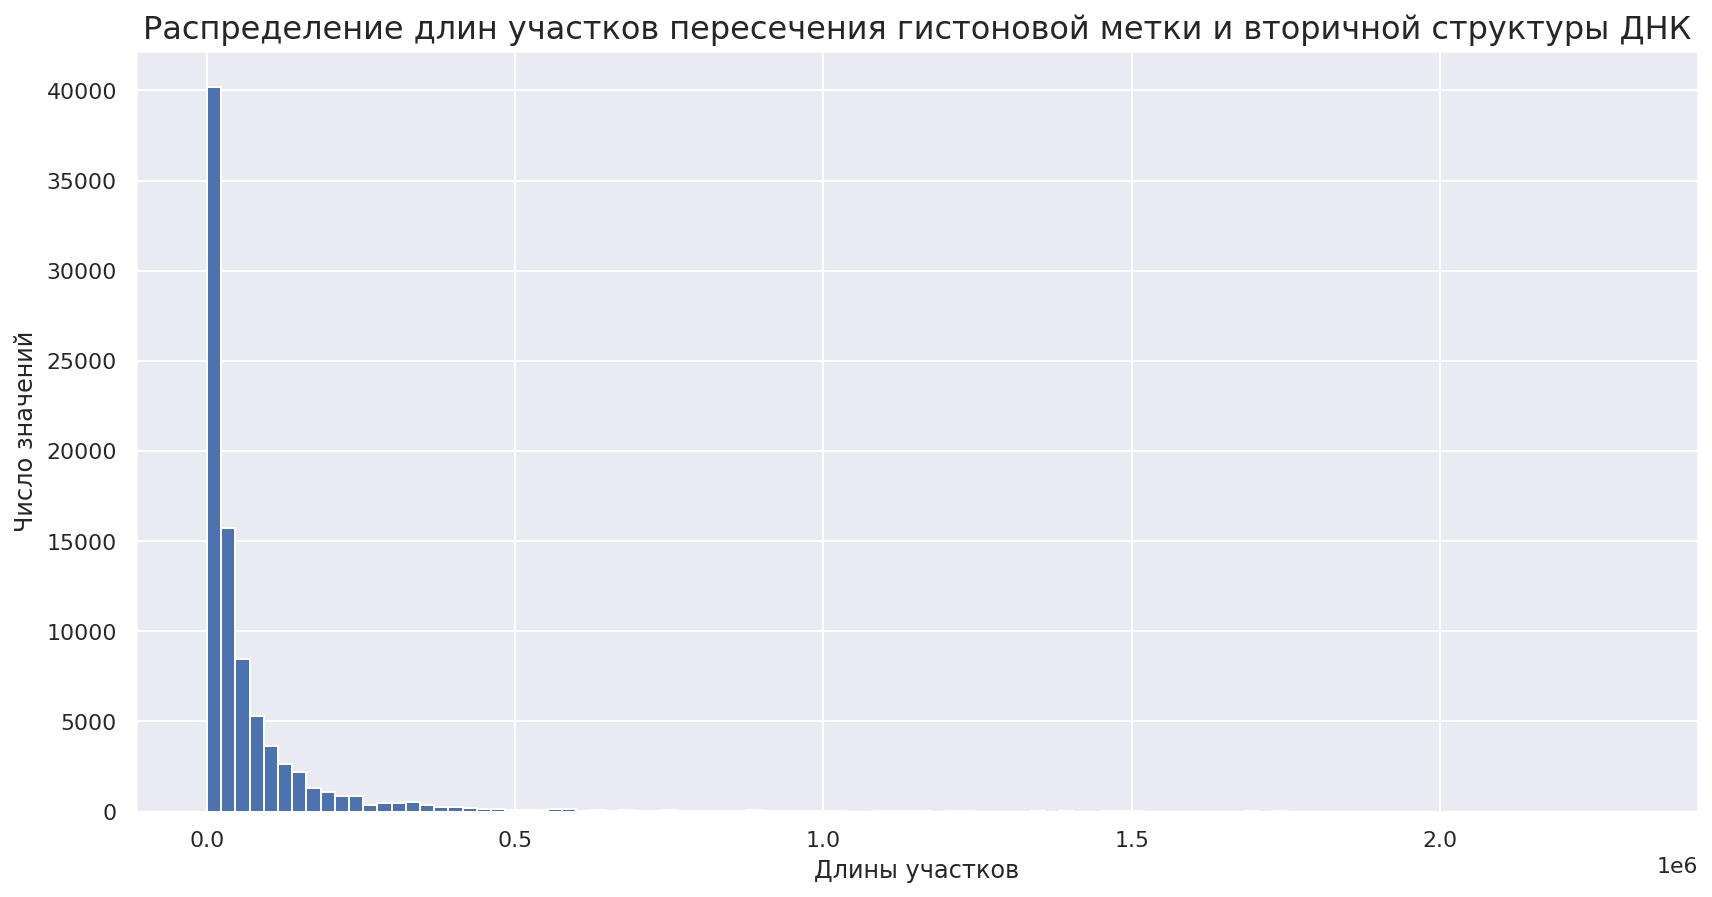

In [31]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['font.size'] = 12
plt.hist(genome['chromEnd'] - genome['chromStart'], bins=100)
plt.title('Распределение длин участков пересечения гистоновой метки и вторичной структуры ДНК', size=16)
plt.xlabel('Длины участков')
plt.ylabel('Число значений')
plt.show()

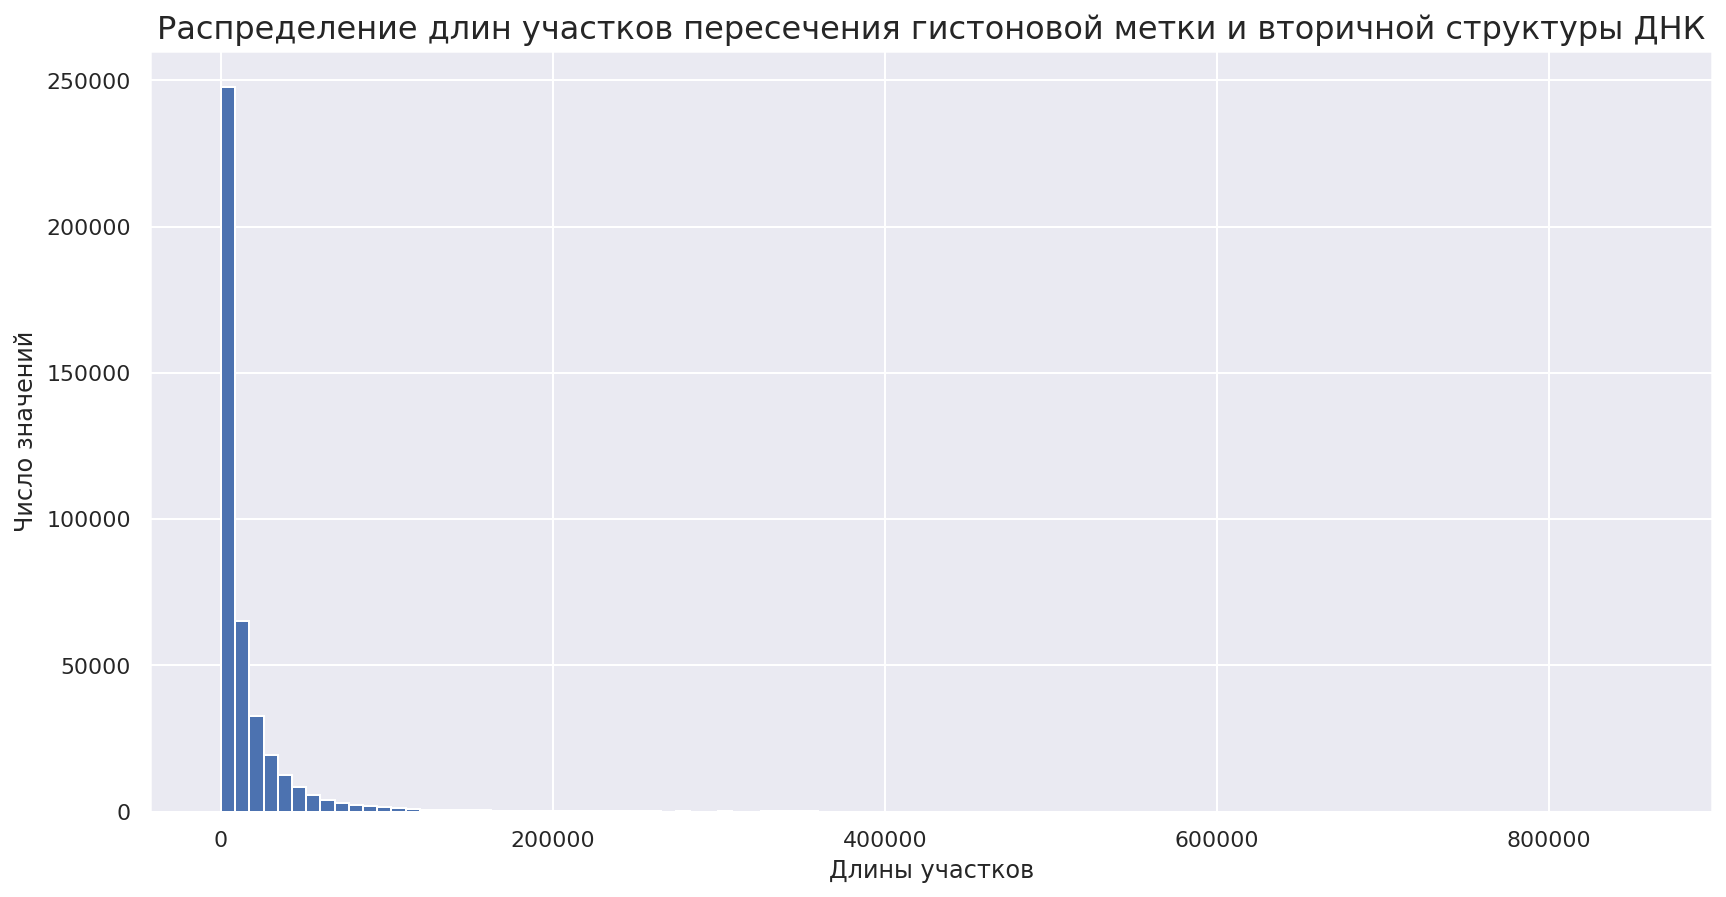

In [32]:
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['font.size'] = 12
plt.hist(neg['chromEnd'] - neg['chromStart'], bins=100)
plt.title('Распределение длин участков пересечения гистоновой метки и вторичной структуры ДНК', size=16)
plt.xlabel('Длины участков')
plt.ylabel('Число значений')
plt.show()

In [33]:
neg.drop(neg[neg['len'] != 14].index, inplace=True)

In [34]:
neg

,chrom,chromStart,chromEnd,3,4,5,6,7,8,9,10,11,len
4502,chr1,89149792,89149806,NR_110682.1,0,-,89150887,89150887,0,4,"3147,145,209,41,","0,19391,32474,147651,",14
7559,chr1,3418692,3418706,NM_001409.4,0,-,3407091,3527832,0,37,"2639,48,129,129,129,129,129,129,129,132,129,12...","0,2961,4688,5820,6045,6420,6662,7939,8704,9037...",14
12816,chr1,94883944,94883958,NM_001122674.2,0,+,94884034,94944106,0,9,"200,37,99,89,70,98,124,57,200,","0,40218,46386,49530,55377,56754,57225,59870,60...",14
12818,chr1,94883944,94883958,NM_002858.4,0,+,94884034,94982685,0,23,"200,37,99,89,70,98,124,57,143,70,70,98,92,92,7...","0,40218,46386,49530,55377,56754,57225,59870,62...",14
17836,chr1,223537288,223537302,NM_017982.4,0,-,223395533,223536767,0,9,"1390,383,145,192,189,174,213,183,120,","0,2418,6763,8366,43799,47671,71608,142447,143226,",14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397463,chr22,31199125,31199139,NM_001282738.2,0,+,31090047,31302326,0,15,"291,137,209,254,193,118,55,147,246,121,104,96,...","0,426,47379,176647,193644,194441,195398,195708...",14
397483,chr22,31199125,31199139,NM_001282739.2,0,+,31090896,31302326,0,14,"680,209,254,193,118,55,147,246,121,104,96,185,...","0,46287,175555,192552,193349,194306,194616,195...",14
397503,chr22,31199125,31199139,NM_030758.4,0,+,31090896,31302326,0,14,"680,209,254,193,118,58,147,246,121,104,96,185,...","0,46287,175555,192552,193349,194303,194616,195...",14
397515,chr22,31199125,31199139,NM_001282740.2,0,+,31266660,31302326,0,13,"140,254,193,118,55,147,246,121,104,96,185,233,...","0,106176,123173,123970,124927,125237,126475,12...",14


In [35]:
# pos.drop(['len'], axis=1, inplace=True)

In [36]:
# pos.drop(['center'], axis=1, inplace=True)

In [37]:
neg.drop(['len'], axis=1, inplace=True)

In [38]:
# neg = neg.sample(pos.shape[0]*5)

In [39]:
neg.to_csv('neg1.bed', index=None, sep="\t", header=None)

Переведем получившиеся bed файлы в формат fasta:

In [40]:
!./twoBitToFa  http://hgdownload.cse.ucsc.edu/gbdb/hg19/hg19.2bit -bed=neg1.bed neg.fa

In [41]:
# pos.to_csv('pos1.bed', index=None, sep="\t", header=None)

In [42]:
# !bedtools intersect -a Genome.bed -b pos1.bed -wa > pos.bed

In [43]:
# !./twoBitToFa  http://hgdownload.cse.ucsc.edu/gbdb/hg19/hg19.2bit -bed=pos.bed pos.fa

# Собственно нейросеть

In [44]:
import numpy as np
import tensorflow.compat.v1 as tf
import time
import math
import sys

In [45]:
__author__ = 'jasperz'
# This code was created with
# python 3.5
# tensorflow 1.7
# cuda 9.0
# cudnn 7.0


import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import numpy as np
import tensorflow.compat.v1 as tf
import time
import math
import sys


# An object of this class represents a neural network, which you can build, print, train, evaluate, save and load.
# Below, the functions are discussed in detail.

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
class NetworkModel:
    tf.disable_v2_behavior()
    # The constructor for the NetworkModel class comes with one optional argument. If no filename is given in input,
    # it just creates a new, empty neural network model from scratch. If a filename is given, it loads a model that was
    # previously saved to that file using the saveModel(...) function. Note that loaded files can only be used for
    # evaluation, and not for (re)training or adding extra layers.
    def __init__(self, file_to_load = None):
        tf.reset_default_graph()
        self.all_layers = []

        gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.1)
        config = tf.ConfigProto(gpu_options=gpu_options)
        config.gpu_options.allow_growth = True

        self.sess = tf.Session(config=config)

        if not file_to_load:
            self.X_placeholder = tf.placeholder(tf.float32, [None, 50, 4],name='X_placeholder')
            self.Y_placeholder = tf.placeholder(tf.float32, [None, 2],name='Y_placeholder')
            self.loaded = False
            self.nn = None
        else:
            self.loaded = True
            self._loadNetworkParameters('models/'+file_to_load)
            self.X_placeholder = tf.get_default_graph().get_tensor_by_name('X_placeholder:0')
            self.Y_placeholder = tf.get_default_graph().get_tensor_by_name('Y_placeholder:0')
            self.predictions_softmax = tf.get_default_graph().get_tensor_by_name('softmax_prediction:0')

    # This function adds an input layer to the network. This is the first layer that should be added to every network
    # model.
    def addInputLayer(self):
        assert len(self.all_layers) == 0, 'The input layer should be the first layer of the network, and can only be added once.'
        self.all_layers.append(('Input layer','',self.X_placeholder))

    # This function adds a convolutional layer to the network, with the specified arguments. You should always specify
    # the number of filters (with an upper limit of 500), and the filter width (with an upper limit of 64). There is
    # also an optional argument which lets you choose whether or not zero padding is added (as explained in the lecture
    # slides). After each convolutional layer, a rectified linear unit (ReLU) is automatically added for
    # non-linearization purposes.
    def addConvLayer(self, num_of_filters, filter_width, zero_padding = True):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert zero_padding in (True,False), 'zero_padding should be True or False (boolean)'
        assert 0 < num_of_filters < 500, 'The number of filters specified should be a positive number, smaller than 500'
        assert 0 < filter_width < 64, 'The width of your filters should be a positive number, smaller than 64'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        assert 'Fully-connected layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a convolutional layer after a fully-connected layer'
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a convolutional layer after a softmax layer'
        prev_width = self.all_layers[-1][-1].shape[1]
        assert zero_padding or prev_width >= filter_width, 'You cannot add a (non-zeropadded) convolution of width {} when the previous layer has an output width of {}'.format(filter_width,prev_width)
        self.all_layers.append(('Convolutional layer',
                                '{} filters, width {}, {}zero padding, with ReLU'.format(num_of_filters,
                                                                                         filter_width,
                                                                                         'no ' if not zero_padding else ''),
                                tf.layers.conv1d(self.all_layers[-1][-1],
                                                 filters=num_of_filters,
                                                 kernel_size=filter_width,
                                                 activation=tf.nn.relu,
                                                 padding='same' if zero_padding else 'valid')))

    # This function adds a max pooling layer to the network, with the specified pool size (with an upper limit of 50).
    def addMaxPoolLayer(self, pool_size):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert 'Fully-connected layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a pooling layer after a fully-connected layer'
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a pooling layer after a softmax layer'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        assert 0 < pool_size < 50, 'The pool size should be lower than 50'
        prev_width = self.all_layers[-1][-1].shape[1]
        assert prev_width >= pool_size, 'You cannot add a pooling layer with pool size {} when the previous layer has an output width of {}'.format(pool_size,prev_width)
        self.all_layers.append(('Max pooling layer',
                                'pool size {}'.format(pool_size),
                                tf.layers.max_pooling1d(self.all_layers[-1][-1],
                                                        pool_size=pool_size,
                                                        strides=pool_size)))
    # This function adds a fully-connected layer to the network, with the specified number of neurons (with an upper
    # limit of 1000). If it is the first fully-connected layer in the network, it will also add a flatten layer first,
    # which reduces the dimensionality after the convolutional/pooling layers. For instance, if the output of the last
    # pooling layer is (?, 20, 100), the flatten layer will change this to (?, 2000). It is also no longer possible to
    # add convolutional or pooling layers after this. After each fully-connected layer, a rectified linear unit (ReLU)
    # is automatically added for non-linearization purposes.
    def addFullyConnectedLayer(self,num_of_neurons):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a fully-connected layer after a softmax layer'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        assert 0 < num_of_neurons < 1000, 'The amount of neurons in this layer should be a positive number, lower than 2000'
        if len(self.all_layers[-1][-1].shape) > 2:
            self.all_layers.append(('Flatten layer',
                                    '',
                                   tf.layers.flatten(self.all_layers[-1][-1])))
        self.all_layers.append(('Fully-connected layer',
                                '{} neurons, with ReLU'.format(num_of_neurons),
                                tf.layers.dense(self.all_layers[-1][-1],num_of_neurons)))

    # This function adds an output layer to the network, which has two neurons: one for negative classification and one
    # for positive classification. A softmax calculation is also done, so that the probabilities that are outputted by
    # both neurons add up to 1. Once an output layer is added, no other layers can be added anymore.
    def addOutputLayer(self):
        assert len(self.all_layers) > 0 and self.all_layers[0][0].startswith('Input layer')
        assert 'Softmax (output) layer' not in [typ for typ,_,_ in self.all_layers], 'You cannot add a softmax (output) layer after a softmax layer'
        assert len(self.all_layers)+1 < 21, 'The total amount of layers should be at most 20'
        if len(self.all_layers[-1][-1].shape) > 2:
            self.all_layers.append(('Flatten layer',
                                    '',
                                    tf.contrib.layers.flatten(self.all_layers[-1][-1])))
        # assert no output layer yet
        # assert # of layers
        self.all_layers.append(('Softmax (output) layer',
                                '2 neurons',
                                tf.layers.dense(self.all_layers[-1][-1], 2,name='logits')))
    # You can use this function for printing out an overview of the layers that you have added to the network. It can
    # be not only be used for a completed network, but also intermediately, for a network that is still being built.
    # The output is printed out, and will consist of three columns: the type of layer, the hyperparameters (such as the
    # number of neurons) and the output size after this layer. This output size will be shown in a format (?, 200, 100).
    # The question mark indicates the amount of input samples (which is not fixed), so in building your network you can
    # ignore this.
    def printDetails(self):
        print('####################################')
        print('Network information:')
        # count all parameters:
        total_parameters = 0
        # iterating over all variables
        for variable in tf.trainable_variables():
            local_parameters = 1
            shape = variable.get_shape()  # getting shape of a variable
            for i in shape:
                local_parameters *= i.value  # mutiplying dimension values
            total_parameters += local_parameters
        print('This network has {} trainable parameters.'.format(total_parameters))

        for i,(name,info,l) in enumerate(self.all_layers):
            try:
                print('{: >2d}. {:23} {:50} -> Output size: {}'.format(i, name, info, l.shape))
            except AttributeError:
                pass
        print('')
        print('####################################')


    # To train the network, you will first need to read in the datasets, and convert the sequences to the right format.
    # More in this format will follow in the assignments. After supplying the training and validation sets, you need to
    # specify for how many epochs you want to train (maximum 100). The training and validation costes and accuracies
    # will be shown on the screen.
    def train(self, trainX, trainY, validX, validY, n_epochs):
        print('####################################')
        assert 'Input layer' in [typ for typ,_,_ in self.all_layers], 'You cannot train a model without an input layer'
        assert 'Softmax (output) layer' in [typ for typ,_,_ in self.all_layers], 'You cannot train a model without an output layer'
        assert self.loaded == False, 'You can not (re)train a model loaded from a file.'
        assert 1 < n_epochs < 100, 'The number of epochs should be greater than 1 and lower than 100'
        assert all(type(l) == list for l in (trainX, trainY, validX, validY)), 'trainX, trainY, validX and validY should all be lists'
        assert all(len(l) > 0 for l in (trainX, trainY, validX, validY)), 'trainX, trainY, validX and validY should not be empty'

        assert len(trainX) == len(trainY), 'trainX and trainY should have the same amount of samples'
        assert len(trainX[0]) == 50 and len(trainX[0][0]) == 4 and type(trainX[0][0][0]) == int, 'trainX should have size (_, 200, 4) and should contain integers'
        assert type(trainY[0]) == int, 'trainY should have length n (for n sequences) and should contain integers'

        assert len(validX) == len(validY), 'validX and validY should have the same amount of samples'
        assert len(validX[0]) == 50 and len(validX[0][0]) == 4 and type(validX[0][0][0]) == int, 'validX should have size (_, 200, 4) and should contain integers'
        assert type(validY[0]) == int, 'validY should have length n (for n sequences) and should contain integers'
        # assert input and output layer
        self._prepare_training()

        self.sess.run(tf.global_variables_initializer())
        self.sess.run(tf.local_variables_initializer())
        train_dataset = _Dataset(trainX, trainY)
        valid_dataset = _Dataset(validX, validY)
        self._printOutputClasses(train_dataset,'training')
        self._printOutputClasses(valid_dataset,'validation')

        best_valid_score = 999999
        print()
        print(' {:^5} | {:^14} | {:^14} | {:^11} | {:^11} | {:^8} '.format('epoch','train cost','valid cost','train acc','valid acc','time'))
        print('-{:-^6}+{:-^16}+{:-^16}+{:-^13}+{:-^13}+{:-^9}-'.format('','','','','',''))

        tr_cost, tr_acc = self._evaluateSet(train_dataset)
        va_cost, va_acc = self._evaluateSet(valid_dataset)
        print(' {:5d} |   {:2.8f}   |   {:2.8f}   |  {:1.7f}  | {:1.7f}  | {:4.2f}s '.format(0,tr_cost,tr_acc,va_cost,va_acc,0))

        for epoch in range(1,n_epochs+1):
            epoch_start_time = time.time()
            epoch_finished = False
            while not epoch_finished:
                batch_x, batch_y, epoch_finished = train_dataset.next_batch(256)
                self.sess.run(self.train_op, feed_dict={self.X_placeholder: batch_x, self.Y_placeholder: batch_y})
            tr_cost, tr_acc = self._evaluateSet(train_dataset)
            va_cost, va_acc = self._evaluateSet(valid_dataset)

            if va_cost < best_valid_score:
                best_valid_score = va_cost
                message = '-> model selected'
                self._storeNetworkParameters('models/tmp')
            else:
                message = ''
            print(' {:5d} |   {:2.8f}   |   {:2.8f}   |  {:1.7f}  | {:1.7f}  | {:4.2f}s {}'.format(epoch,tr_cost,va_cost,tr_acc,va_acc,time.time()-epoch_start_time,message))

        self._loadNetworkParameters('models/tmp')
        print('Finished training')
        print('####################################')

    # This is the function you will use to generate predictions for a certain dataset. In input, you give a list of
    # sequences, in the one-hot encoding format (again, see the assignments). It will output a list of probabilities
    # as calculated by the network. The list is a two-dimensional list of size (n, 2), with n being the number of
    # sequences in testX. This means that the list will be a list will contain n lists of size 2, each containing the
    # negative and positive probability for the prediction.
    def generatePredictions(self, testX):
        assert len(testX[0]) == 50 and len(testX[0][0]) == 4 and type(testX[0][0][0]) == int, 'testX should have size (_, 200, 4) and should contain integers'
        assert self.loaded or 'Input layer' in [typ for typ,_,_ in self.all_layers], 'You cannot test a model without an input layer'
        assert self.loaded or 'Softmax (output) layer' in [typ for typ,_,_ in self.all_layers], 'You cannot test a model without an output layer'
        # assert input and output layer
        all_preds = []
        for i in range(math.ceil(len(testX)/256)):
            batch_x = np.asarray(testX[i*256:(i+1)*256])
            preds = self.sess.run(self.predictions_softmax,feed_dict={self.X_placeholder:batch_x})
            for i in range(len(preds)):
                all_preds.append((preds[i][0],preds[i][1]))
        return all_preds

    # At any time, you can save your current model (with its layers and trained parameters) to a file. However, it
    # really only makes sense to do this after training. To load this model again, create a new NetworkModel object,
    # and specify the same filename in the file_to_load parameter. Note: after loading a model, it cannot be
    # (re)trained.
    def saveModel(self, file_to_save_to):
        assert 'Input layer' in [typ for typ,_,_ in self.all_layers], 'You cannot save a model without an input layer'
        assert 'Softmax (output) layer' in [typ for typ,_,_ in self.all_layers], 'You cannot save a model without an output layer'
        # assert input and output layer
        assert not self.loaded, 'You cannot save a loaded model again.'
        self._storeNetworkParameters('models/'+file_to_save_to)

    def _prepare_training(self):
        # assert all layers -1 == output layer
        gs = tf.train.get_or_create_global_step()
        self.predictions_softmax = tf.nn.softmax(self.all_layers[-1][-1],name='softmax_prediction')

        self.cost_f = tf.losses.softmax_cross_entropy(onehot_labels=self.Y_placeholder, logits=self.all_layers[-1][-1])
        self.optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
        self.train_op = self.optimizer.minimize(loss=self.cost_f,global_step=gs)

        self.acc_f, self.acc_op = tf.metrics.accuracy(labels=tf.argmax(self.Y_placeholder, axis=1),predictions=tf.argmax(self.predictions_softmax, axis=1),name='metric_acc')
        self.metric_var_initializer = tf.variables_initializer(var_list=tf.get_collection(tf.GraphKeys.LOCAL_VARIABLES, scope='metric'))

    def _evaluateSet(self, dataset):
        self.sess.run(self.metric_var_initializer)
        costs = []
        batches_done = False
        while not batches_done:
            batch_x, batch_y, epoch_finished = dataset.next_batch(256)

            cost_batch = self.sess.run(self.cost_f, feed_dict={self.X_placeholder: batch_x,self.Y_placeholder: batch_y})
            _ = self.sess.run([self.acc_op], feed_dict={self.X_placeholder: batch_x,self.Y_placeholder: batch_y})
            costs.extend([cost_batch] * len(batch_y))

            if epoch_finished:
                batches_done = True

        accuracy = self.sess.run([self.acc_f])[0]
        return np.average(costs),accuracy

    def _printOutputClasses(self, dataset, label):
        print()
        counts = dataset.getClassCounts()
        print('Number of {} examples: {}'.format(label,int(np.sum(counts))))
        if len(counts) > 1:
            print('Distribution of the {} set:'.format(label))
            for i in range(min(10,len(counts))):
                print('  # elements of class {} = {}'.format(i,int(counts[i])))

    def _storeNetworkParameters(self, saveToDir):
        try:
            saver = tf.train.Saver()
            if not os.path.exists(saveToDir):
                os.makedirs(saveToDir)
            saver.save(self.sess,saveToDir+'/'+saveToDir[saveToDir.rfind('/')+1:])
        except Exception:
            print('SOMETHING WENT WRONG WITH STORING SHIT JASPER!! ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print(sys.exc_info())
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    def _loadNetworkParameters(self, saveToDir):
        filename = saveToDir+'/'+saveToDir[saveToDir.rfind('/')+1:]
        if self.loaded:
            saver = tf.train.import_meta_graph(filename+'.meta')
        else:
            saver = tf.train.Saver()
        saver.restore(self.sess, tf.train.latest_checkpoint(saveToDir))


class _Dataset:

    def __init__(self,x_data,y_data=None):
        if isinstance(x_data,list):
            x_data = np.asarray(x_data)

        self.index_in_epoch = 0
        self.x_data = x_data
        self.num_samples = x_data.shape[0]

        if y_data:
            if isinstance(y_data,list):
                y_data = self._convertY(y_data)
                self.y_data = y_data
        else:
            self.y_data = []
    def __len__(self):
        return len(self.x_data)

    def getClassCounts(self):
        return np.sum(self.y_data,axis=0)

    def _convertY(self, y_data):
        out = np.zeros((len(y_data),2))
        for i,cl in enumerate(y_data):
            out[i][cl] = 1
        return out

    def next_batch(self,batch_size):
        start = self.index_in_epoch
        end = self.index_in_epoch + batch_size

        if start == 0:
            idx = np.arange(0, self.num_samples)  # get all possible indexes
            np.random.shuffle(idx)  # shuffle indexes
            self.x_data = self.x_data[idx]
            if len(self.y_data) > 0:
                self.y_data = self.y_data[idx]

        if end < self.num_samples:
            self.index_in_epoch = end
            return self.x_data[start:end], self.y_data[start:end], False # epoch finished = False
        else:
            self.index_in_epoch = 0
            return self.x_data[start:], self.y_data[start:], True #epoch finished = True


    def stepsInEpoch(self,batch_size):
        return math.ceil(len(self) / batch_size)

    def getX(self):
        return self.x_data

    def getSequenceLength(self):
        return len(self.x_data[0])

Instructions for updating:
non-resource variables are not supported in the long term


In [46]:
def convertLines(lines):
    newLines = []
    for line in lines:
        newline = []
        for c in line.strip():
            v = []
            if c == 'A':
                v = [1,0,0,0]
            elif c == 'C':
                v = [0,1,0,0]
            elif c == 'G':
                v = [0,0,1,0]
            elif c == 'T':
                v = [0,0,0,1]
            if v != []:
                newline.append(v)
        newLines.append(newline)
    return newLines

In [47]:
def readInputs(f1,f2):
    lines_pos = open(f1).readlines()
    lines_neg = open(f2).readlines()

    X = []
    Y = []

    for l in convertLines(lines_pos):
        X.append(l)
        Y.append(1)
    for l in convertLines(lines_neg):
        X.append(l)
        Y.append(0)

    return X,Y

In [48]:
def regular_network():
  net_model = NetworkModel()
  net_model.addInputLayer()
  net_model.addFullyConnectedLayer(50)
  net_model.addFullyConnectedLayer(50)
  net_model.addOutputLayer()
  return net_model

In [49]:
nm = regular_network()
nm.printDetails()

####################################
Network information:
This network has 12702 trainable parameters.
 0. Input layer                                                                -> Output size: (?, 50, 4)
 1. Flatten layer                                                              -> Output size: (?, 200)
 2. Fully-connected layer   50 neurons, with ReLU                              -> Output size: (?, 50)
 3. Fully-connected layer   50 neurons, with ReLU                              -> Output size: (?, 50)
 4. Softmax (output) layer  2 neurons                                          -> Output size: (?, 2)

####################################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:132: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future v

In [50]:
X, y = readInputs('pos.fa', 'neg.fa')

In [51]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=2)
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.2, random_state=212)

In [52]:
len(validX[0])

50

К сожалению, нейросетка не запустилась, какие бы танцы с бубнами я над ней ни танцевала. Честно говоря, идей уже нет, сидела часов 10, не получается(

In [54]:
nm.train(trainX,trainY,validX,validY,10)

####################################

Number of training examples: 21380
Distribution of the training set:
  # elements of class 0 = 21157
  # elements of class 1 = 223

Number of validation examples: 5346
Distribution of the validation set:
  # elements of class 0 = 5288
  # elements of class 1 = 58

 epoch |   train cost   |   valid cost   |  train acc  |  valid acc  |   time   
-------+----------------+----------------+-------------+-------------+----------


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: ignored

In [55]:
def conv_network():
  cnn_model = NetworkModel()
  cnn_model.addInputLayer()
  cnn_model.addConvLayer(10,7)
  cnn_model.addMaxPoolLayer(5)
  cnn_model.addConvLayer(20,5)
  cnn_model.addMaxPoolLayer(5)
  cnn_model.addFullyConnectedLayer(15)
  cnn_model.addOutputLayer()
  return cnn_model

In [56]:
cnn = conv_network()
cnn.printDetails()

####################################
Network information:
This network has 1957 trainable parameters.
 0. Input layer                                                                -> Output size: (?, 50, 4)
 1. Convolutional layer     10 filters, width 7, zero padding, with ReLU       -> Output size: (?, 50, 10)
 2. Max pooling layer       pool size 5                                        -> Output size: (?, 10, 10)
 3. Convolutional layer     20 filters, width 5, zero padding, with ReLU       -> Output size: (?, 10, 20)
 4. Max pooling layer       pool size 5                                        -> Output size: (?, 2, 20)
 5. Flatten layer                                                              -> Output size: (?, 40)
 6. Fully-connected layer   15 neurons, with ReLU                              -> Output size: (?, 15)
 7. Softmax (output) layer  2 neurons                                          -> Output size: (?, 2)

####################################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: UserWarning: `tf.layers.conv1d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv1D` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:288: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: UserWarning: `tf.layers.max_pooling1d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling1D` instead.
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/pooling.py:294: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: UserWarning: `tf.layers.flatten` is deprecated and will

In [57]:
cnn.train(trainX,trainY,validX,validY,10)

####################################


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



Number of training examples: 21380
Distribution of the training set:
  # elements of class 0 = 21157
  # elements of class 1 = 223

Number of validation examples: 5346
Distribution of the validation set:
  # elements of class 0 = 5288
  # elements of class 1 = 58

 epoch |   train cost   |   valid cost   |  train acc  |  valid acc  |   time   
-------+----------------+----------------+-------------+-------------+----------


ValueError: ignored

In [58]:
pred = cnn.generatePredictions(testX)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: ignored

In [59]:
def recall(preds,labs):
    tp,tn,fn,fp = 0,0,0,0
    for (_,p),l in zip(preds,labs):
        if p >= .5 and l == 1:
            tp += 1
        elif p < .5 and l == 1:
            fn += 1
        elif p >= .5 and l == 0:
            fp += 1
        else:
            tn += 1
    return tp / (tp + fn)


def precision(preds,labs):
    tp,tn,fn,fp = 0,0,0,0
    for (_,p),l in zip(preds,labs):
        if p >= .5 and l == 1:
            tp += 1
        elif p < .5 and l == 1:
            fn += 1
        elif p >= .5 and l == 0:
            fp += 1
        else:
            tn += 1
    return tp / (tp + fp)

def f1(preds,labs):
    r,p = recall(preds,labs), precision(preds,labs)
    return 2 * r * p / (r + p)

In [60]:
print(recall(pred,testY))
print(precision(pred,testY))
print(f1(pred,testY))

NameError: ignored

In [61]:
def gatherSequencesFromFasta(filename):
  s = ''
  all_candidates = []
  all_positions = []
  for line in open(filename):
    if not line.startswith('>'):
      s += line.strip()

  for i in range(99, len(s)-99):
    if s[i:i+2]=='GT':
      candidate_site=s[i-99:i+2+99]
      all_candidates.append(candidate_site)
      all_positions.append(i)

  return all_candidates, all_positions


def formatPositionsAndPredictions(candidates, positions, predictions):
  print('----------------------------')
  print('  Pos  | candidate |   pred ')
  print('----------------------------')

  for cand, pos, (_, pred) in zip (candidates, positions, predictions):
    print(' {:04d}  | {} |   {:1.4f}'.format(pos,cand[100-5:100+5],pred))

In [ ]:
candidates, positions = gatherSequencesFromFasta("/content/mnts/MyDrive/inputs/full_sample.fasta")

In [ ]:
pred = cnn.generatePredictions(convertLines(candidates))

In [ ]:
formatPositionsAndPredictions(candidates,positions, pred)